In [ ]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim import SGD, RMSprop, Adam

# Гиперпараметры
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
EPOCHS = 50

def load_data(batch_size):
    train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
    test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)
    return train_loader, test_loader

train_loader, test_loader = load_data(BATCH_SIZE)

# Определение модели нейронной сети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

# Функция для обучения модели за одну эпоху
def train_epoch(loader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    for X, y in loader:
        preds = model(X)  # Прогнозы модели
        loss = criterion(preds, y)  # Вычисление ошибки
        
        optimizer.zero_grad()  # Обнуление градиентов
        loss.backward()  # Обратное распространение ошибки
        optimizer.step()  # Обновление параметров
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(loader)
    print(f"Средняя ошибка на обучении: {avg_loss:.4f}")
    return avg_loss

# Функция для оценки модели на тестовом наборе данных
def test(loader, model, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in loader:
            preds = model(X)
            loss = criterion(preds, y)
            total_loss += loss.item()
            correct += (preds.argmax(1) == y).sum().item()
    
    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    print(f"Тестовая ошибка: {avg_loss:.4f}, Точность: {accuracy:.2%}")
    return avg_loss, accuracy

# Функция для запуска эксперимента с разными оптимизаторами
def experiment(optimizer_cls, epochs, train_loader, test_loader):
    model = SimpleNN()
    optimizer = optimizer_cls(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()
    train_losses, test_losses = [], []
    
    for epoch in range(epochs):
        print(f"\nЭпоха {epoch + 1}/{epochs} с оптимизатором {optimizer_cls.__name__}")
        train_loss = train_epoch(train_loader, model, criterion, optimizer)
        test_loss, accuracy = test(test_loader, model, criterion)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
    
    return train_losses, test_losses

optimizers = {"SGD": SGD, "RMSprop": RMSprop, "Adam": Adam}
results = {}

for name, opt_cls in optimizers.items():
    print(f"\nНачинаем обучение с оптимизатором {name}")
    train_losses, test_losses = experiment(opt_cls, EPOCHS, train_loader, test_loader)
    results[name] = {"train_losses": train_losses, "test_losses": test_losses}




Начинаем обучение с оптимизатором SGD

Эпоха 1/50 с оптимизатором SGD
Средняя ошибка на обучении: 2.2217
Тестовая ошибка: 2.1377, Точность: 44.28%

Эпоха 2/50 с оптимизатором SGD
Средняя ошибка на обучении: 2.0102
Тестовая ошибка: 1.8582, Точность: 57.04%

Эпоха 3/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.6674
Тестовая ошибка: 1.4923, Точность: 60.54%

Эпоха 4/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.3483
Тестовая ошибка: 1.2381, Точность: 63.60%

Эпоха 5/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.1450
Тестовая ошибка: 1.0812, Точность: 64.75%

Эпоха 6/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.0158
Тестовая ошибка: 0.9783, Точность: 66.42%

Эпоха 7/50 с оптимизатором SGD
Средняя ошибка на обучении: 0.9286
Тестовая ошибка: 0.9070, Точность: 67.72%

Эпоха 8/50 с оптимизатором SGD
Средняя ошибка на обучении: 0.8671
Тестовая ошибка: 0.8553, Точность: 68.87%

Эпоха 9/50 с оптимизатором SGD
Средняя ошибка на обучении: 0.8209
Тестовая ошибка: 0.816

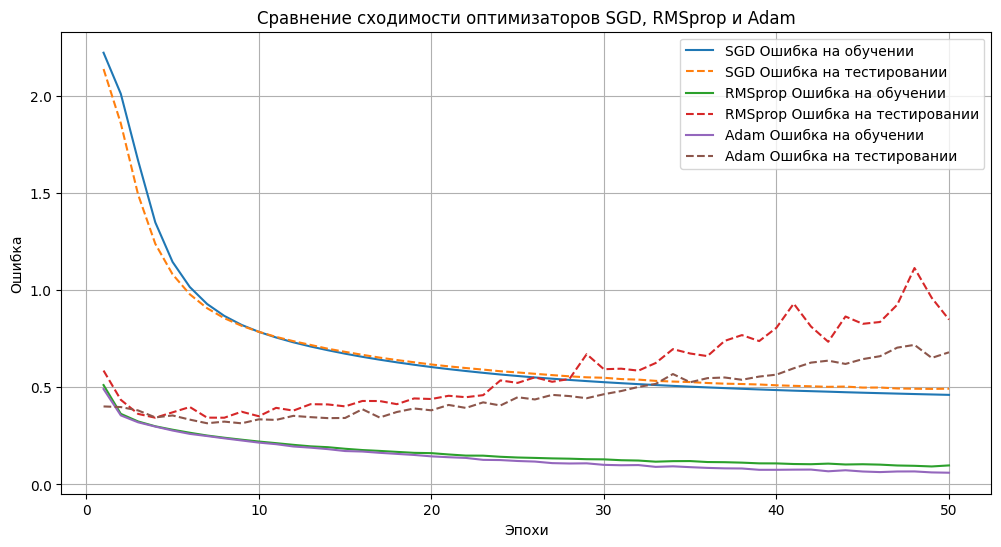

In [14]:
# Построение графиков
plt.figure(figsize=(12, 6))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["train_losses"], label=f"{opt_name} Ошибка на обучении")
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], linestyle="--", label=f"{opt_name} Ошибка на тестировании")

plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Сравнение сходимости оптимизаторов SGD, RMSprop и Adam')
plt.grid(True)
plt.legend()
plt.show()


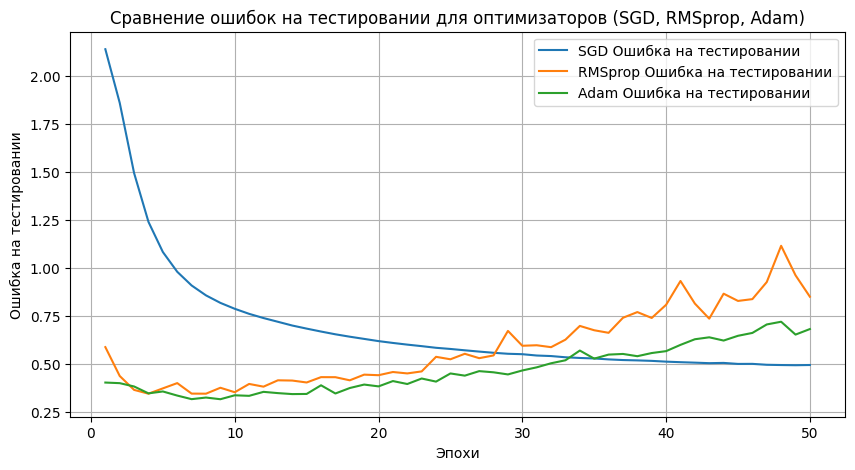

In [15]:
plt.figure(figsize=(10, 5))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], label=f"{opt_name} Ошибка на тестировании")

plt.xlabel('Эпохи')
plt.ylabel('Ошибка на тестировании')
plt.title('Сравнение ошибок на тестировании для оптимизаторов (SGD, RMSprop, Adam)')
plt.grid(True)
plt.legend()

# Показать график
plt.show()


На первых эпохах SGD демонстрирует быстрое снижение ошибки, но затем его сходимость замедляется, и ошибка может либо колебаться, либо уменьшаться менее эффективно. 

RMSprop и Adam, благодаря адаптивной настройке скорости обучения для каждого параметра, обычно показывают более стабильное и быстрое снижение ошибки. 

Adam часто дает наилучшие результаты, так как сочетает адаптивные методы с использованием момента, что ускоряет сходимость и делает процесс обучения более устойчивым.